In [1]:
#import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import erfc
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from random import randrange, uniform
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from scipy.stats import chi2_contingency
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score,roc_curve,auc
!pip install imblearn
from imblearn.over_sampling import SMOTE, RandomOverSampler
%matplotlib inline

os.chdir("C:/Users/chandini c/Desktop")
os.getcwd()

'C:\\Users\\chandini c\\Desktop'

In [2]:
#load data
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")


In [4]:
#shape of train and test data
train.shape, test.shape

((200000, 202), (200000, 201))

In [5]:
#checking types
train.dtypes

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
var_3      float64
var_4      float64
var_5      float64
var_6      float64
var_7      float64
var_8      float64
var_9      float64
var_10     float64
var_11     float64
var_12     float64
var_13     float64
var_14     float64
var_15     float64
var_16     float64
var_17     float64
var_18     float64
var_19     float64
var_20     float64
var_21     float64
var_22     float64
var_23     float64
var_24     float64
var_25     float64
var_26     float64
var_27     float64
            ...   
var_170    float64
var_171    float64
var_172    float64
var_173    float64
var_174    float64
var_175    float64
var_176    float64
var_177    float64
var_178    float64
var_179    float64
var_180    float64
var_181    float64
var_182    float64
var_183    float64
var_184    float64
var_185    float64
var_186    float64
var_187    float64
var_188    float64
var_189    float64
var_190    float64
var_191    f

In [6]:
#observing data
train.head(5)

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 202 columns]

In [7]:
#observing test data
test.head(5)

ID_code    var_0    var_1    var_2   var_3    var_4   var_5   var_6  \
0  test_0  11.0656   7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493   
1  test_1   8.5304   1.2543  11.3047  5.1858   9.1974 -4.0117  6.0196   
2  test_2   5.4827 -10.3581  10.1407  7.0479  10.2628  9.8052  4.8950   
3  test_3   8.5374  -1.3222  12.0220  6.5749   8.8458  3.1744  4.9397   
4  test_4  11.7058  -0.1327  14.1295  7.7506   9.1035 -8.5848  6.8595   

     var_7   var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.2675  2.1337  ...  -2.1556  11.8495  -1.4300   2.4508  13.7112   2.4669   
1  18.6316 -4.4131  ...  10.6165   8.8349   0.9403  10.1282  15.5765   0.4773   
2  20.2537  1.5233  ...  -0.7484  10.9935   1.9803   2.1800  12.9813   2.1281   
3  20.5660  3.3755  ...   9.5702   9.0766   1.6580   3.5813  15.1874   3.1656   
4  10.6048  2.9890  ...   4.2259   9.1723   1.2835   3.3778  19.5542  -0.2860   

   var_196  var_197  var_198  var_199  
0   4.3654  10.7200  15.4722  -8.7197  
1  -1.4852   9.8714  19.1293 -20.9760  
2  -7.1086   7.0618  19.8956 -23.1794  
3   3.9567   9.2295  13.0168  -4.2108  
4  -5.1612   7.2882  13.9260  -9.1846  

[5 rows x 201 columns]

In [8]:
#counting observations per target class
train.target.value_counts()

0    179902
1     20098
Name: target, dtype: int64

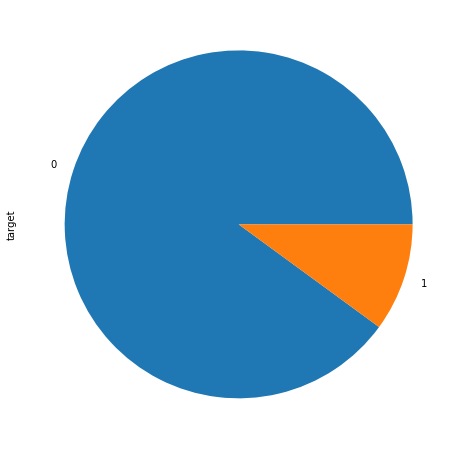

In [9]:
#plotting pie chart for target class
train['target'].value_counts().plot(kind='pie', figsize=(8,8))

In [10]:
#checking for missing values in train data
train.isna().sum().sum()

0

In [11]:
#outlier analysis 
#putting all the df colname in a list
dfcols = list(train.columns)

# exculdig target and index columns
variables = dfcols[2:]

# splitting the list every n elements:
n = 10
chunks = [variables[x:x + n] for x in range(0, len(variables), n)]

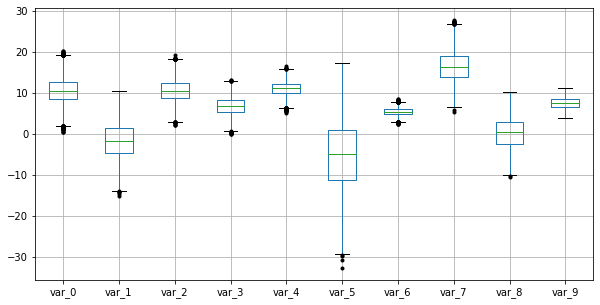

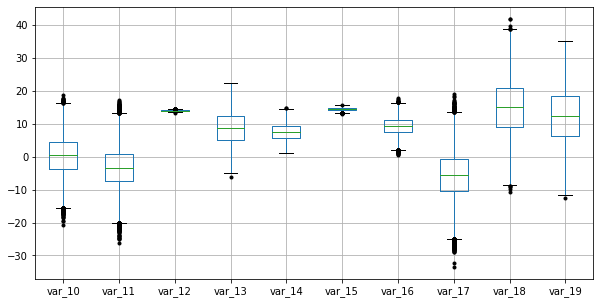

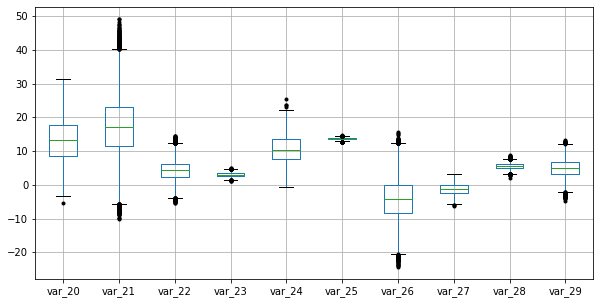

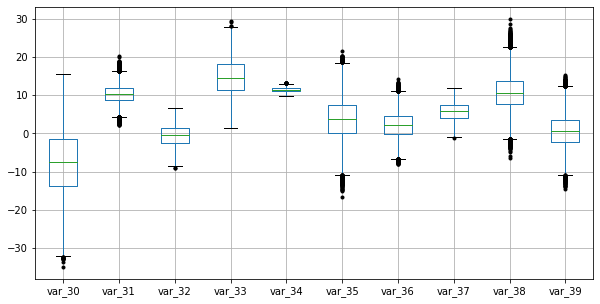

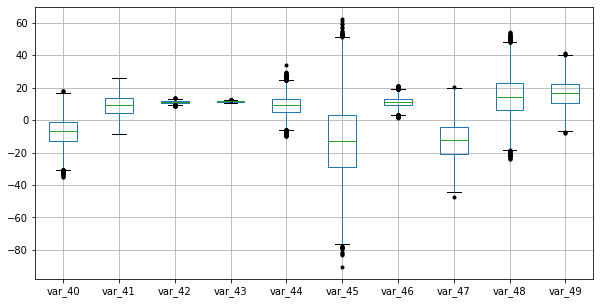

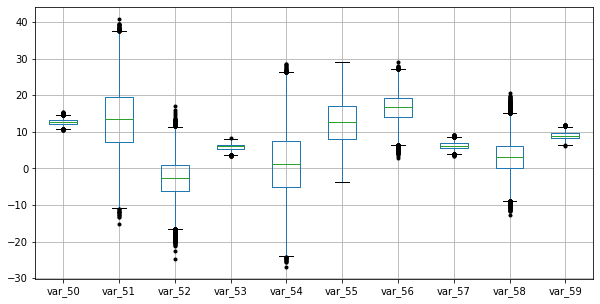

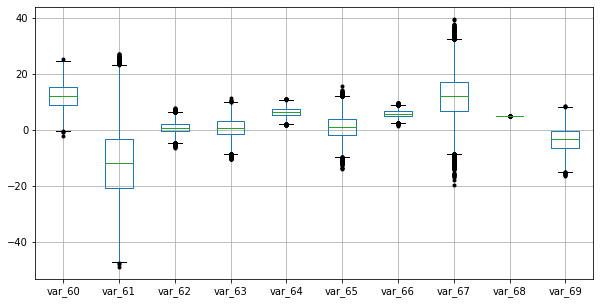

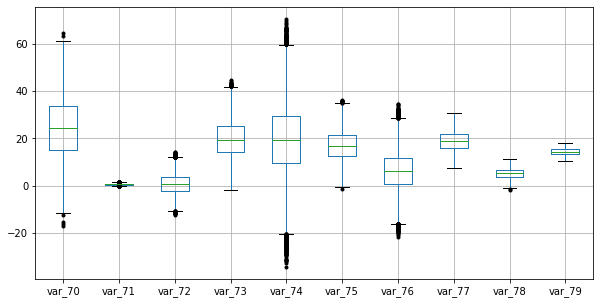

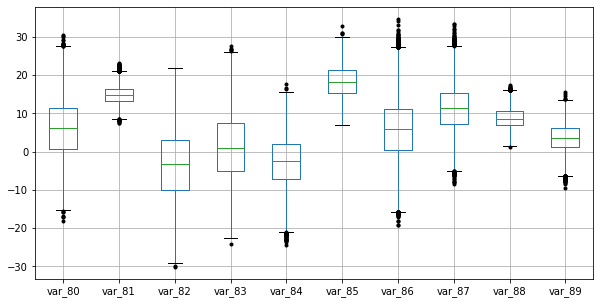

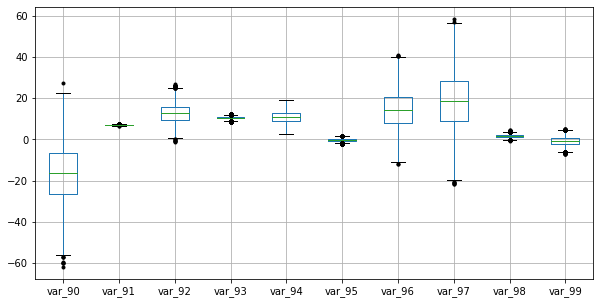

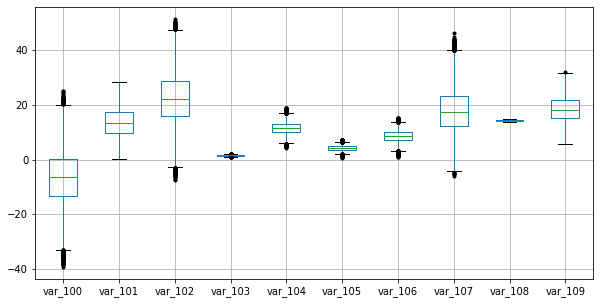

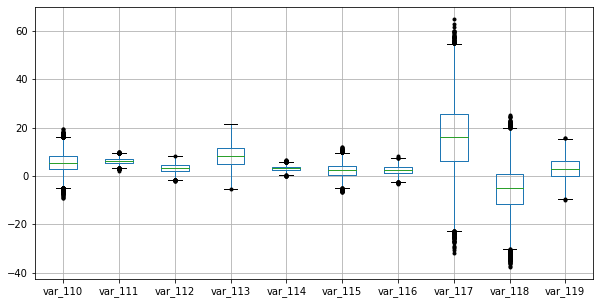

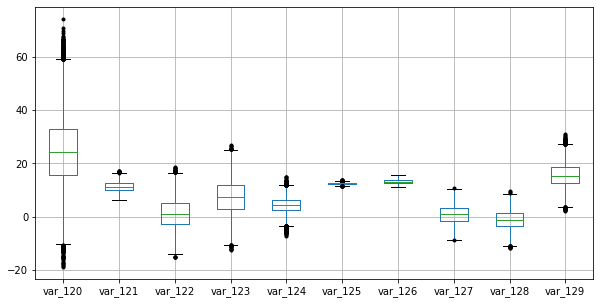

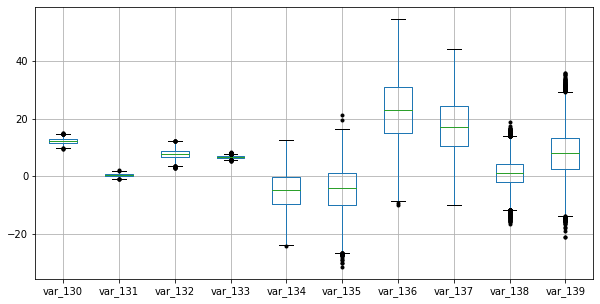

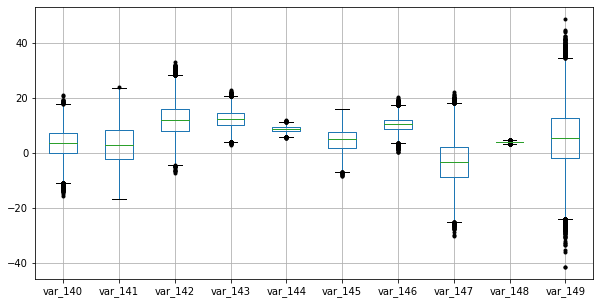

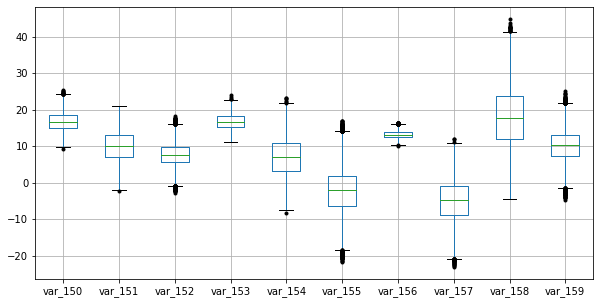

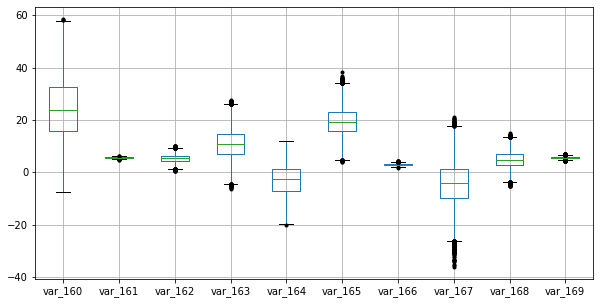

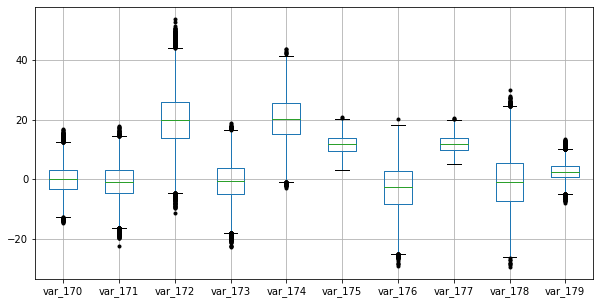

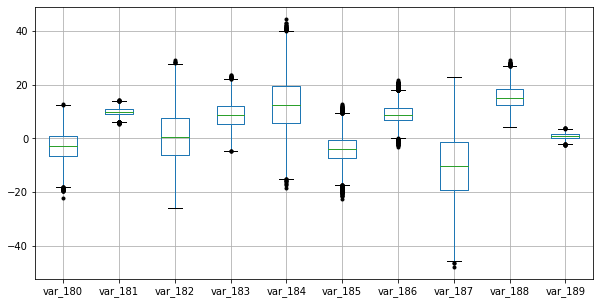

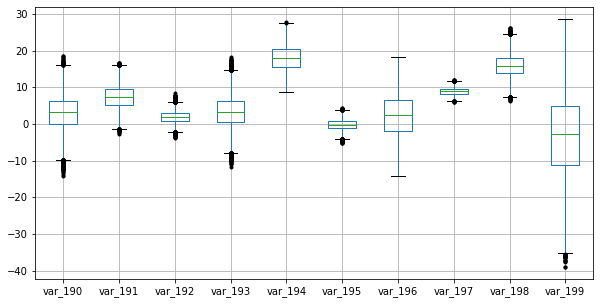

In [12]:
# displaying a boxplot every n columns before removal of outliers(train)
for i in chunks:
    plt.show(train.boxplot(column = i, sym='k.', figsize=(10,5)))

In [13]:
numerical_features=train.columns[2:]

#outliers in each variable in train data 
train_outliers = dict()
for col in [col for col in numerical_features]:
    q75,q25=np.percentile(train.loc[:,col],[75,25])
    Q=q75-q25
    min=q25-(Q*1.5)
    max=q75+(Q*1.5)
    #print(min)
    #print(max)
    train=train.drop(train[train.loc[:,col]<min].index)
    train=train.drop(train[train.loc[:,col]>max].index)

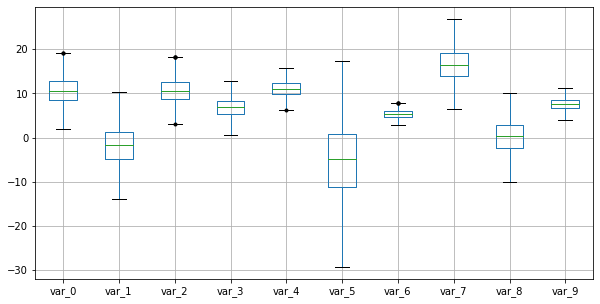

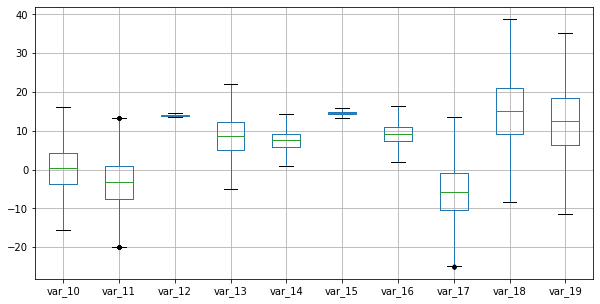

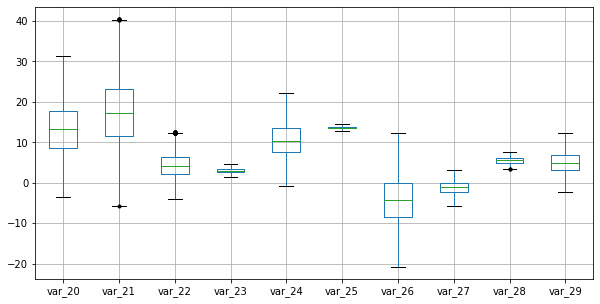

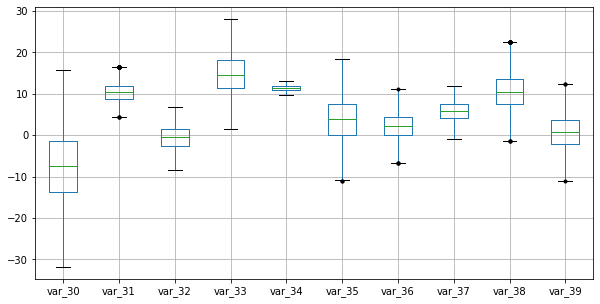

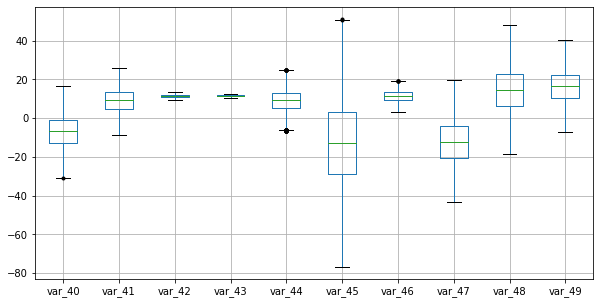

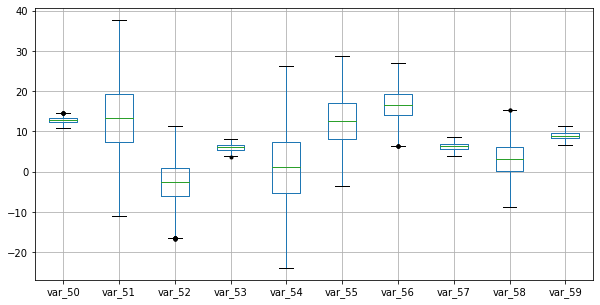

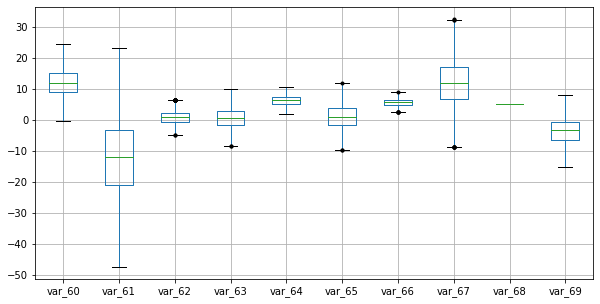

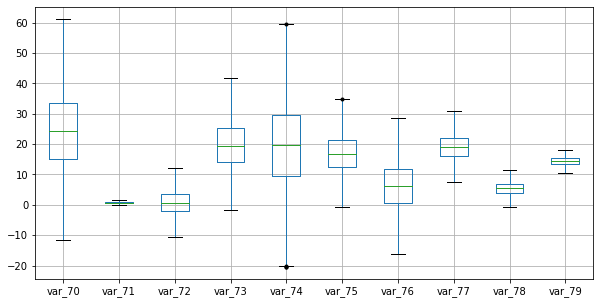

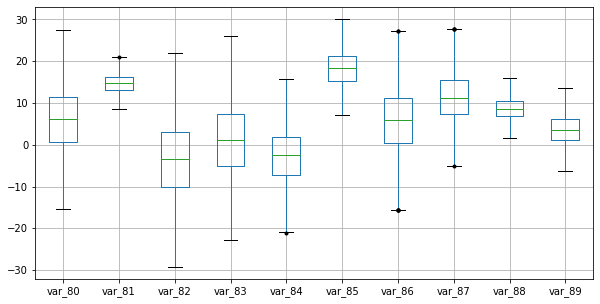

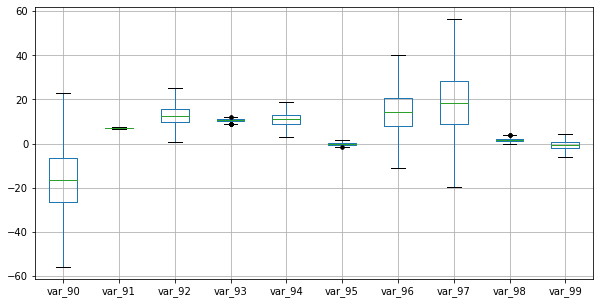

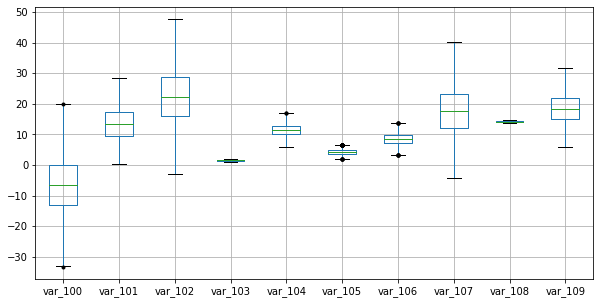

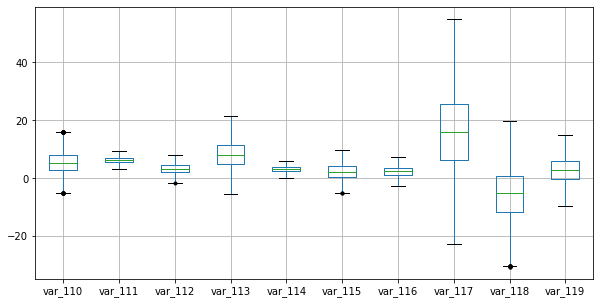

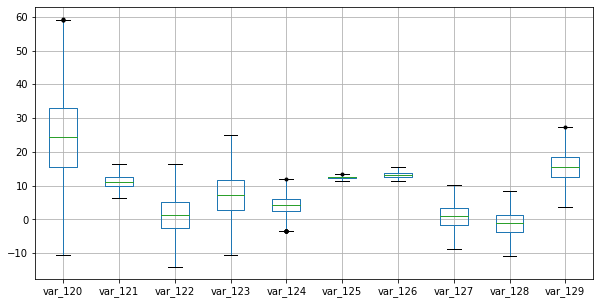

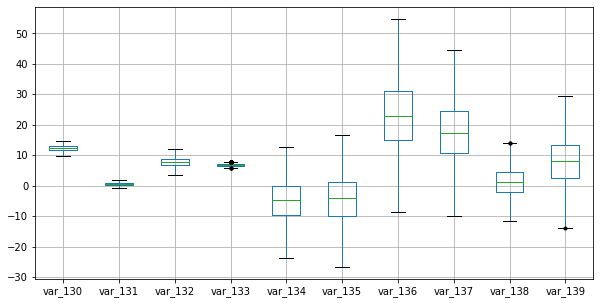

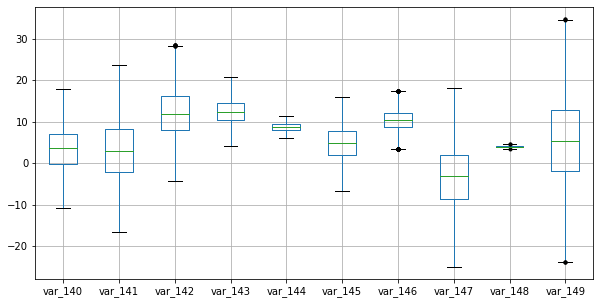

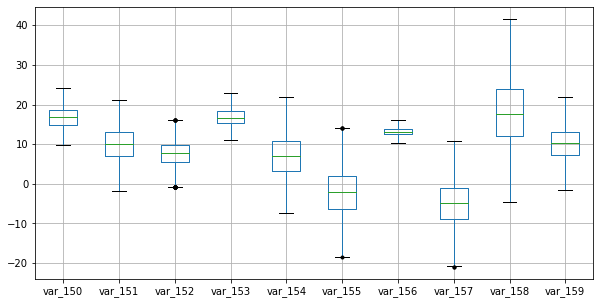

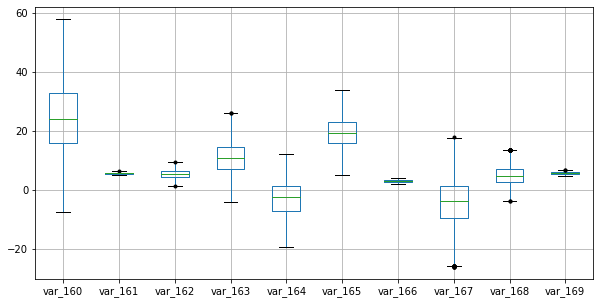

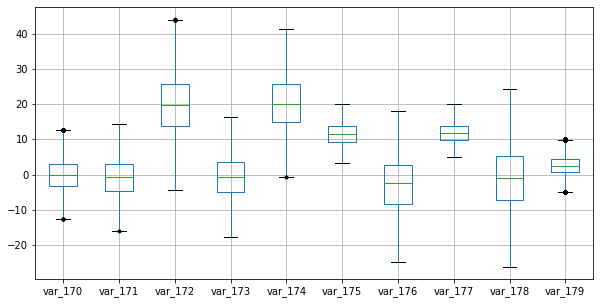

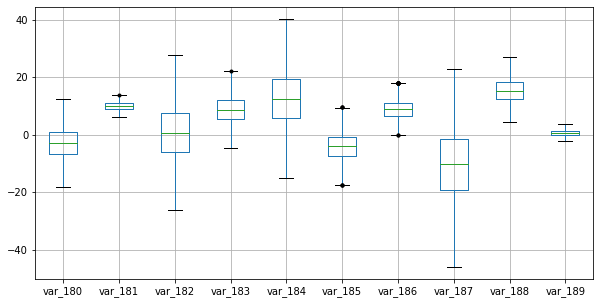

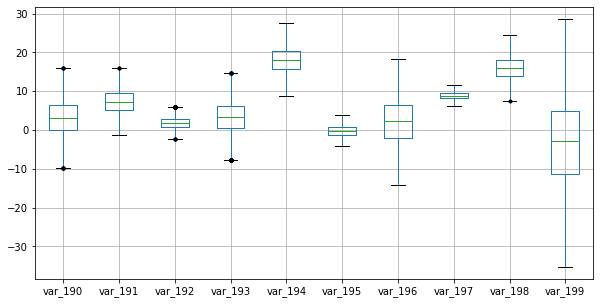

In [14]:
# displaying a boxplot every n columns after removal of outliers:
for i in chunks:
    plt.show(train.boxplot(column = i, sym='k.', figsize=(10,5)))

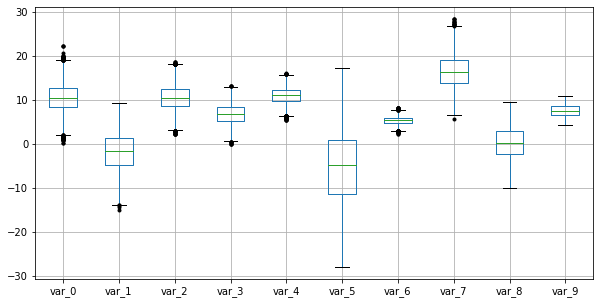

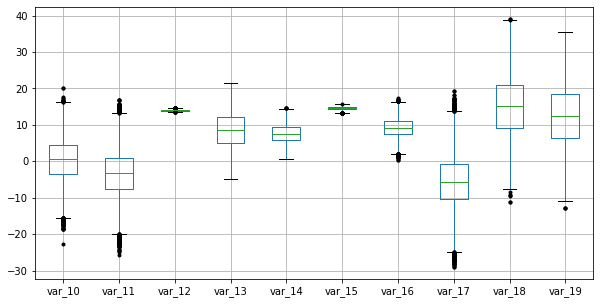

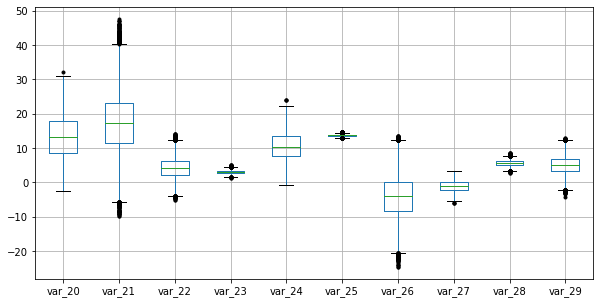

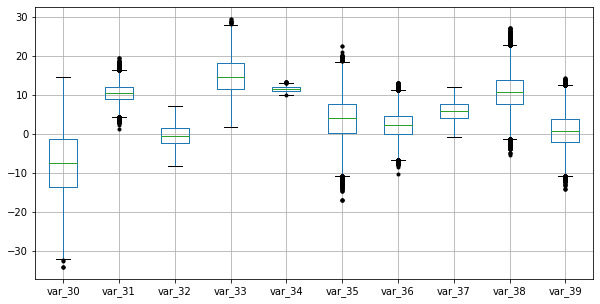

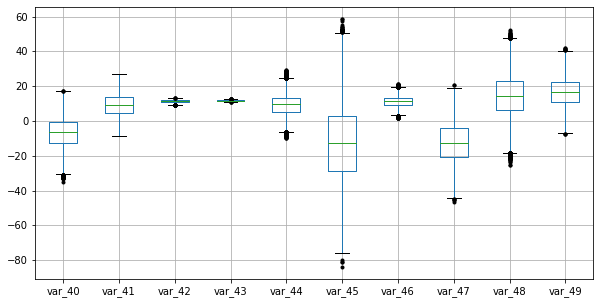

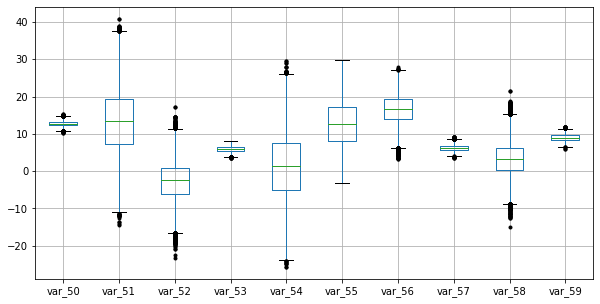

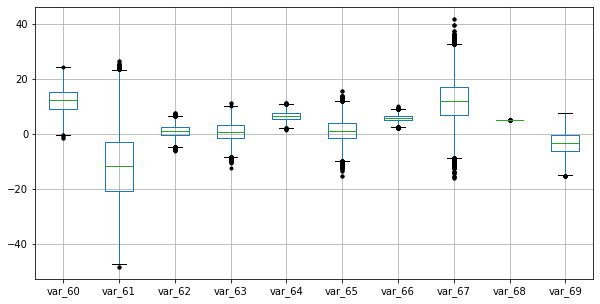

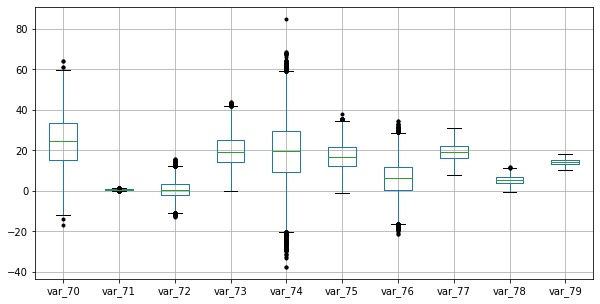

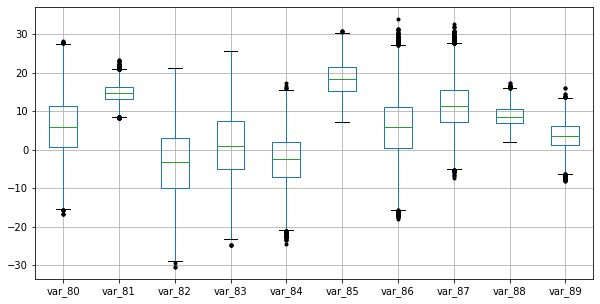

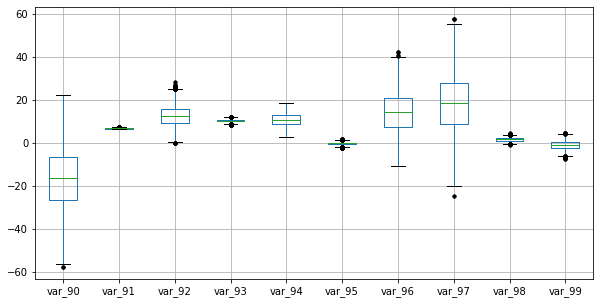

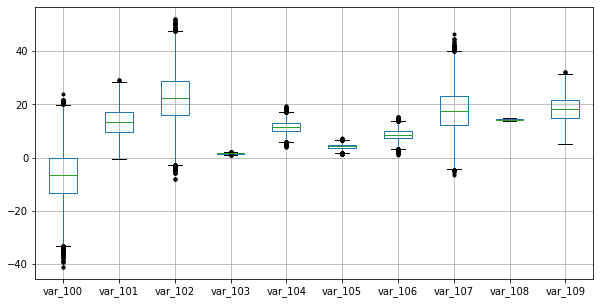

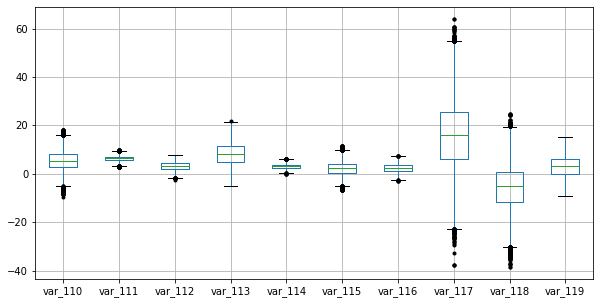

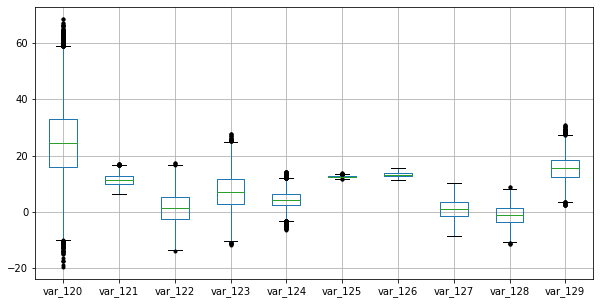

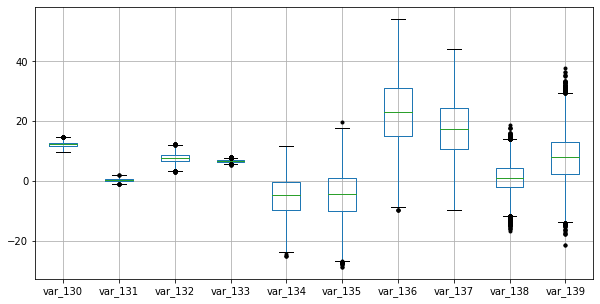

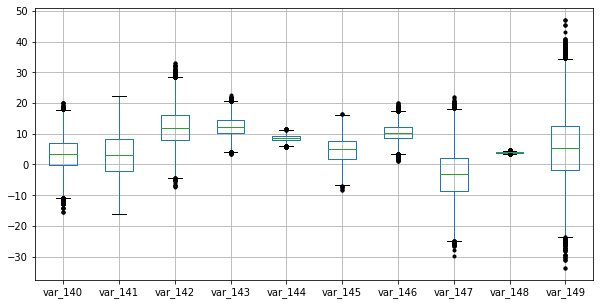

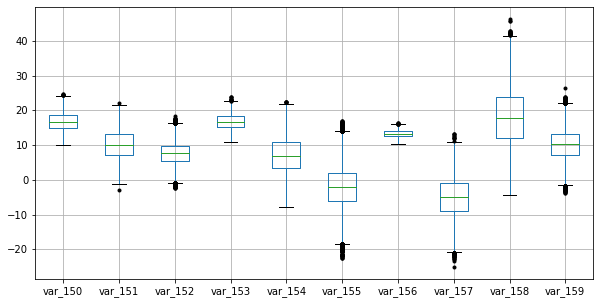

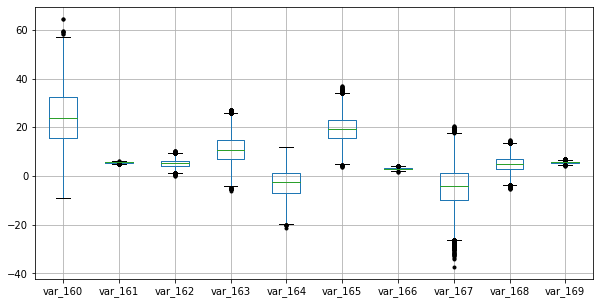

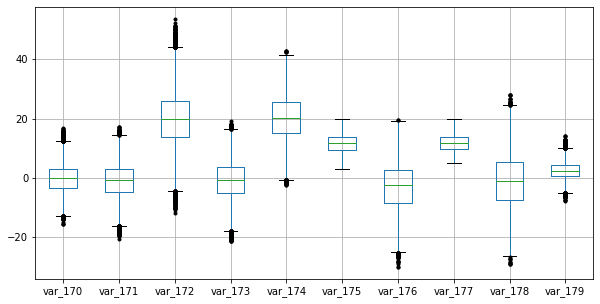

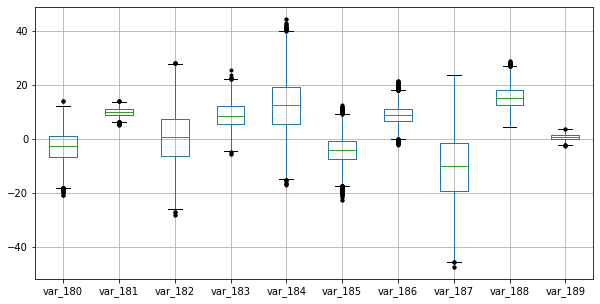

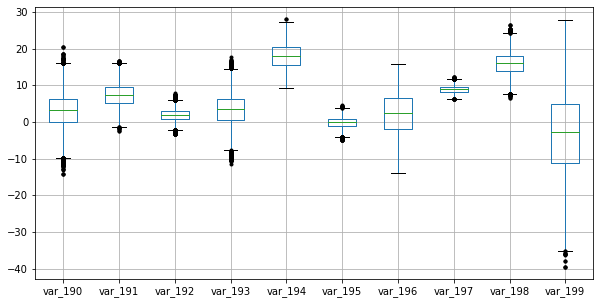

In [15]:
# displaying a boxplot every n columns before removal of outliers (test)
for i in chunks:
    plt.show(test.boxplot(column = i, sym='k.', figsize=(10,5)))

In [16]:
#outliers in each variable in test data 
test_outliers = dict()
for col in [col for col in numerical_features]:
    q75,q25=np.percentile(train.loc[:,col],[75,25])
    Q=q75-q25
    min=q25-(Q*1.5)
    max=q75+(Q*1.5)
    #print(min)
    #print(max)
    test=test.drop(test[test.loc[:,col]<min].index)
    test=test.drop(test[test.loc[:,col]>max].index)

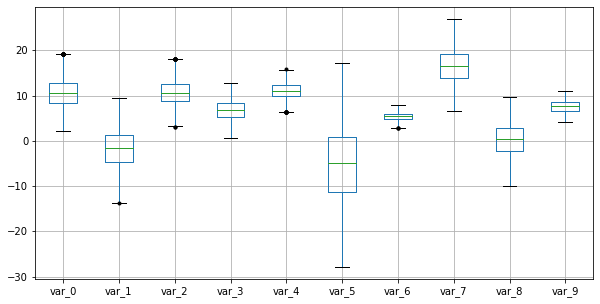

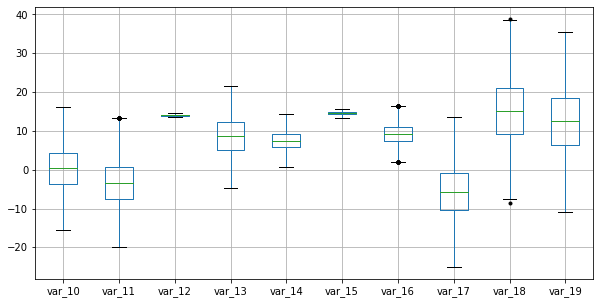

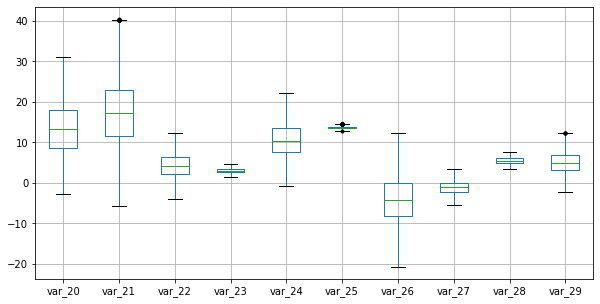

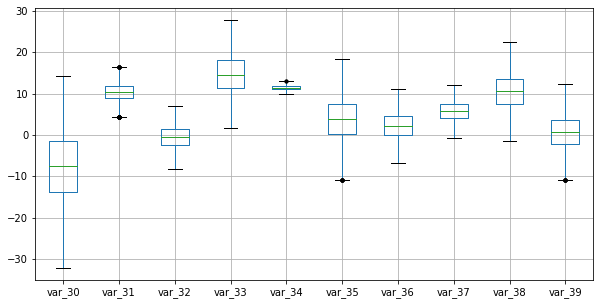

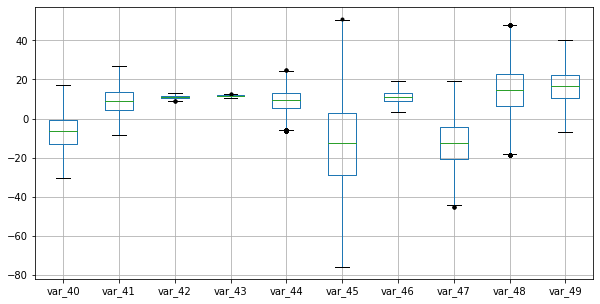

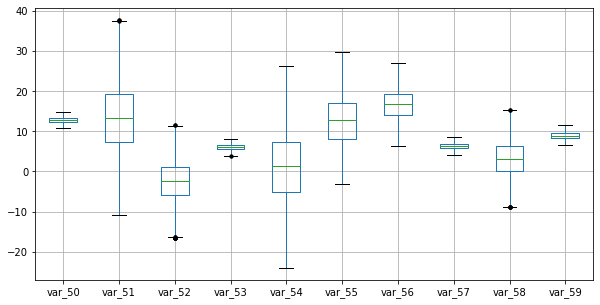

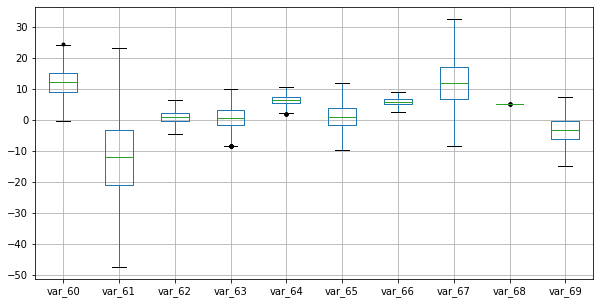

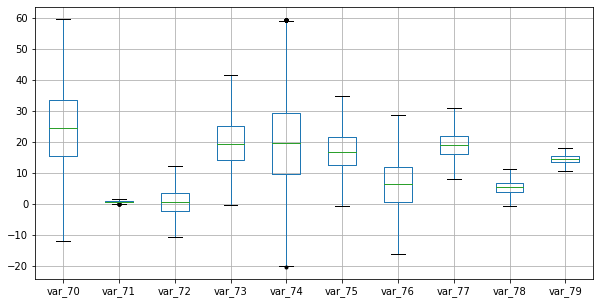

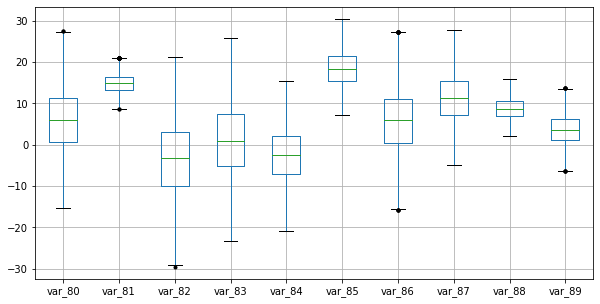

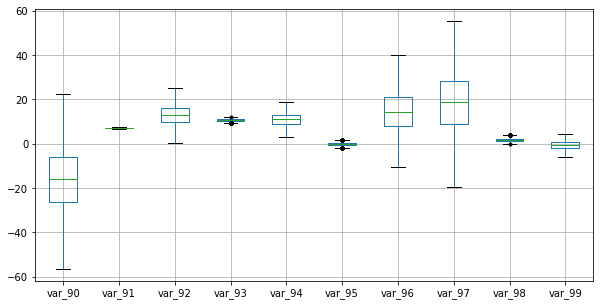

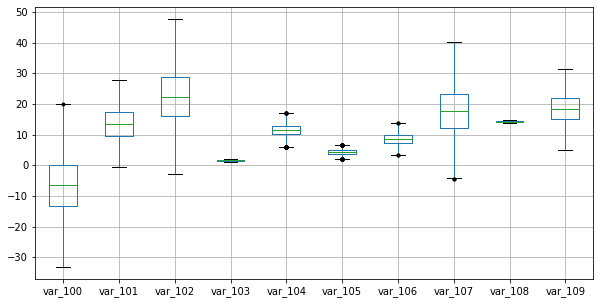

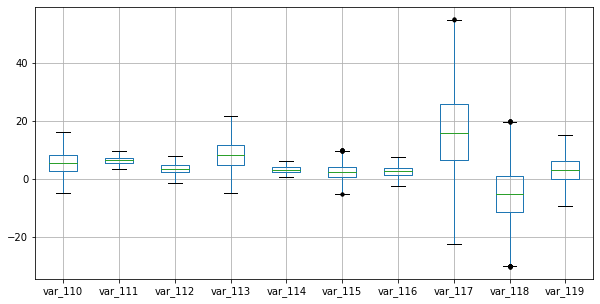

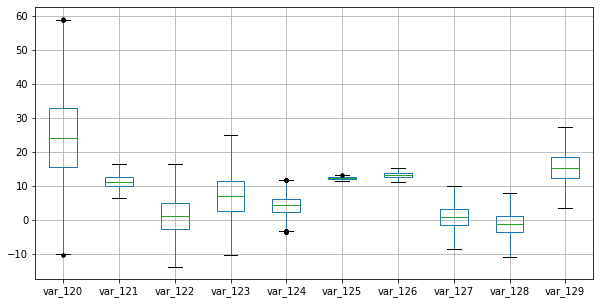

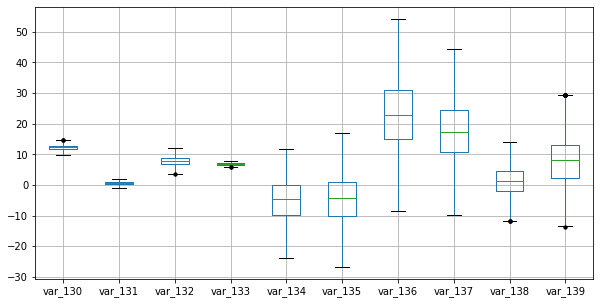

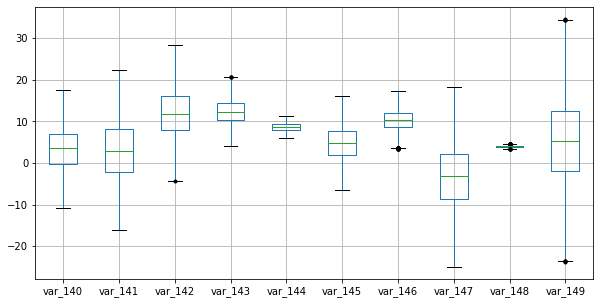

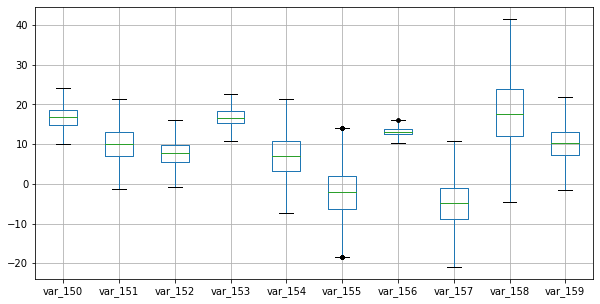

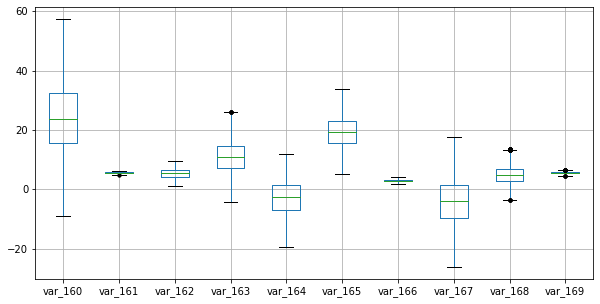

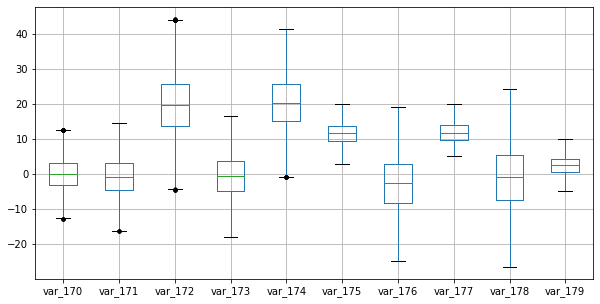

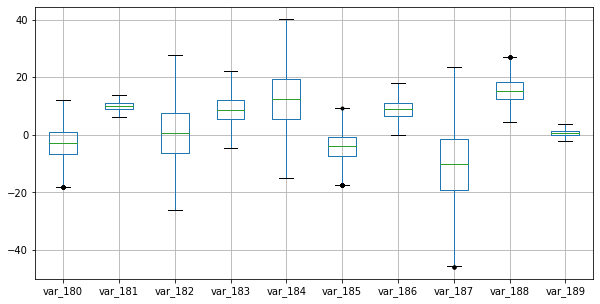

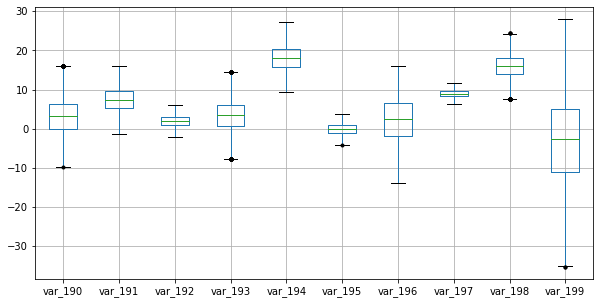

In [17]:
# displaying a boxplot every n columns after removal of outliers:
for i in chunks:
    plt.show(test.boxplot(column = i, sym='k.', figsize=(10,5)))

In [18]:
#shape of train and test data after removal of outliers 
train.shape,test.shape

((175073, 202), (174011, 201))

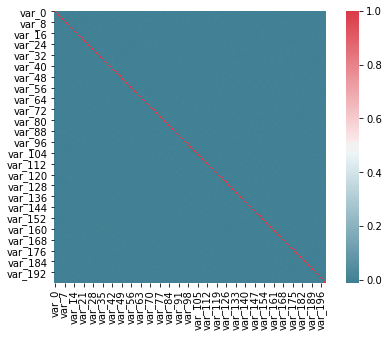

In [19]:
dfcorr=train.loc[:,numerical_features]
dfcorr.shape
f,ax=plt.subplots(figsize=(7,5))
corr=dfcorr.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax)

In [20]:
# Compute the correlation matrix
np.fill_diagonal(corr.values,np.nan)
corr.max().max(),corr.min().min()

(0.009824411895648928, -0.010286443734441413)

Distribution of columns per target class


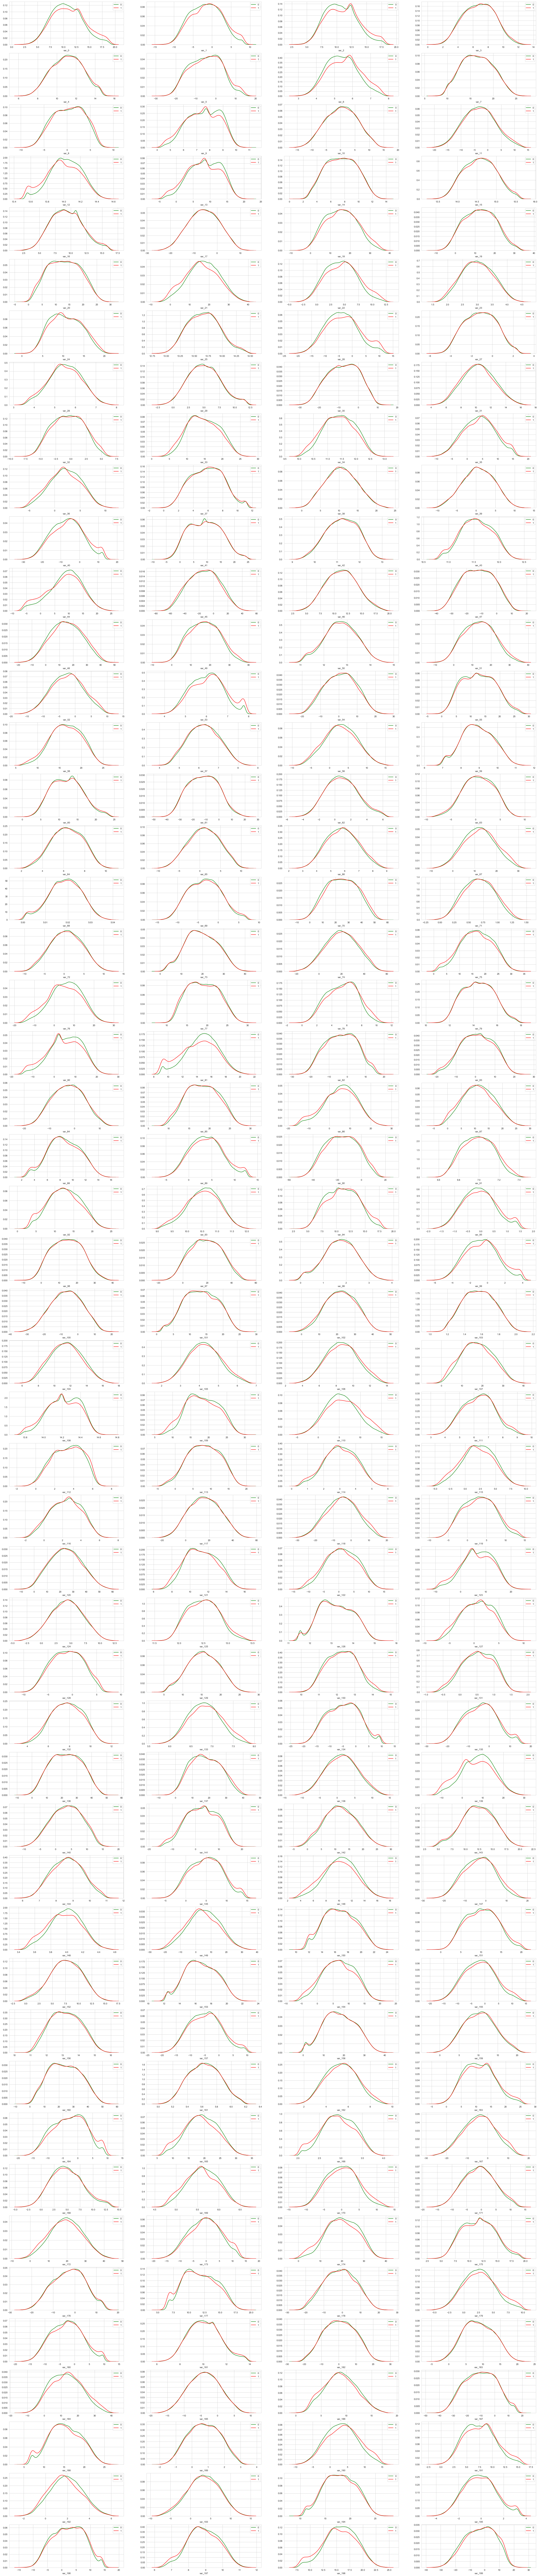

In [21]:
print("Distribution of columns per target class")
sns.set_style('whitegrid')
plt.figure(figsize=(40,200))
for i,col in enumerate(numerical_features):
    plt.subplot(50,4,i+1)
    sns.distplot(train[train['target']==0][col],hist=False,label='0',color='green')
    sns.distplot(train[train['target']==1][col],hist=False,label='1',color='red')

Distribution of Columns


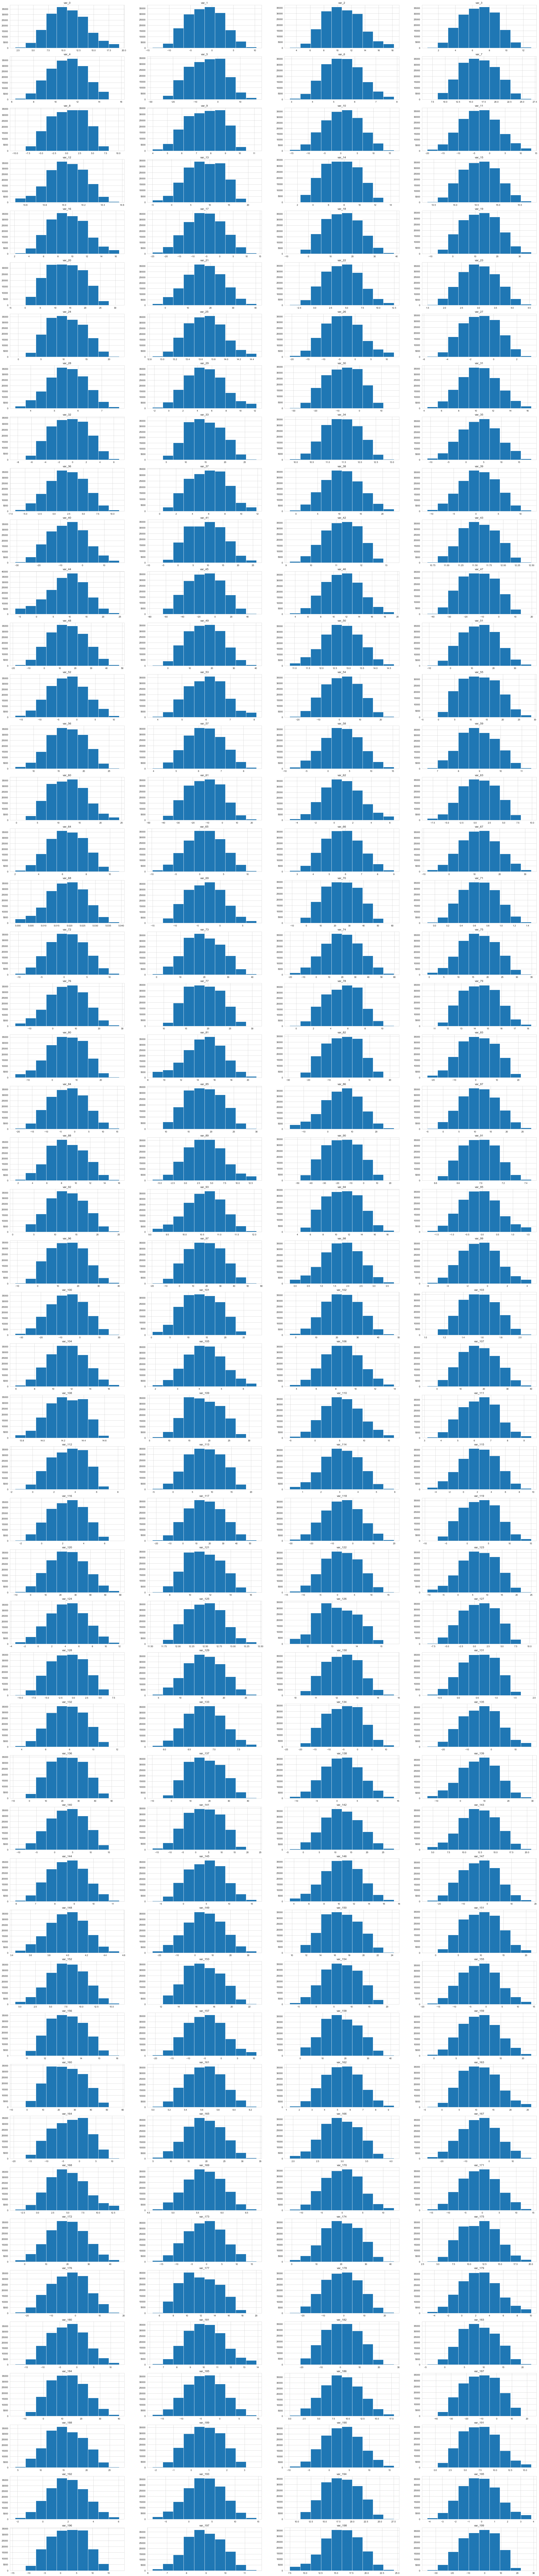

In [22]:
#hisograms are used to check distribution of data 
#draw histograms of numeric data in training set 
print("Distribution of Columns")
plt.figure(figsize=(40,200))
for i,col in enumerate(numerical_features):
    plt.subplot(50,4,i+1)
    plt.hist(train[col])
    plt.title(col)

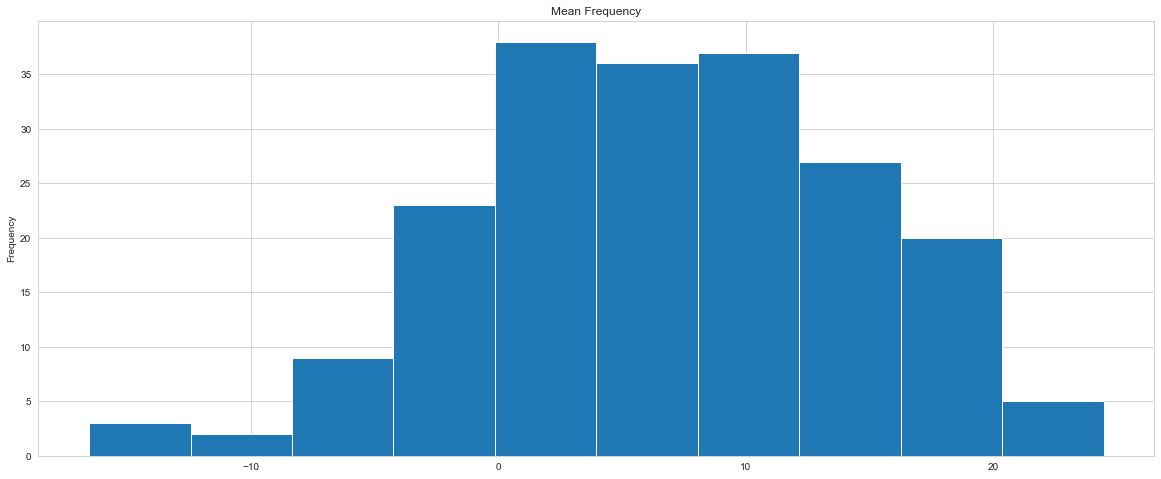

In [23]:
plt.figure(figsize=(20, 8))
train[numerical_features].mean().plot('hist');
plt.title('Mean Frequency');

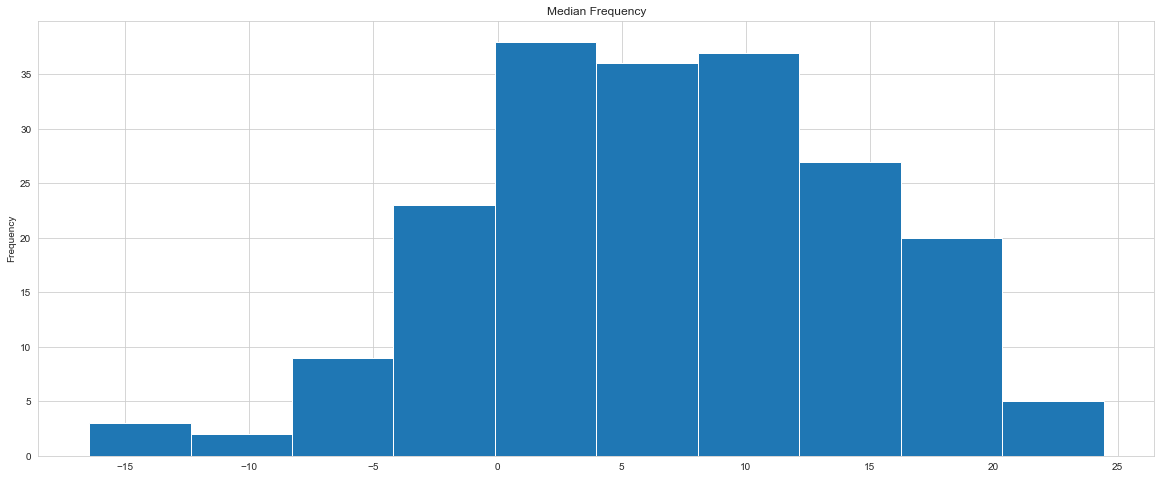

In [24]:
plt.figure(figsize=(20, 8))
train[numerical_features].median().plot('hist');
plt.title('Median Frequency');

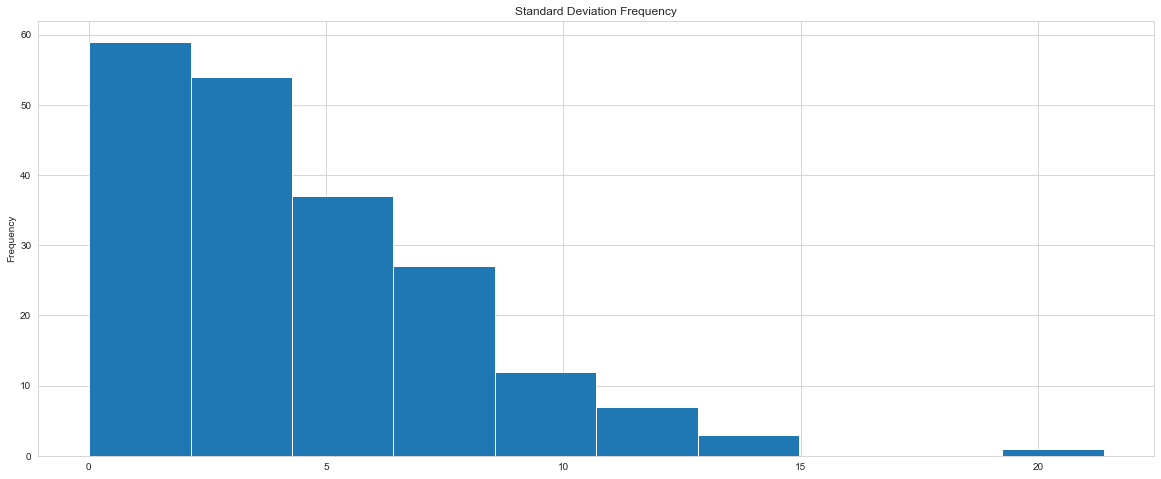

In [25]:
plt.figure(figsize=(20, 8))
train[numerical_features].std().plot('hist');
plt.title('Standard Deviation Frequency');

Text(0.5, 1.0, 'Skewness Frequency')

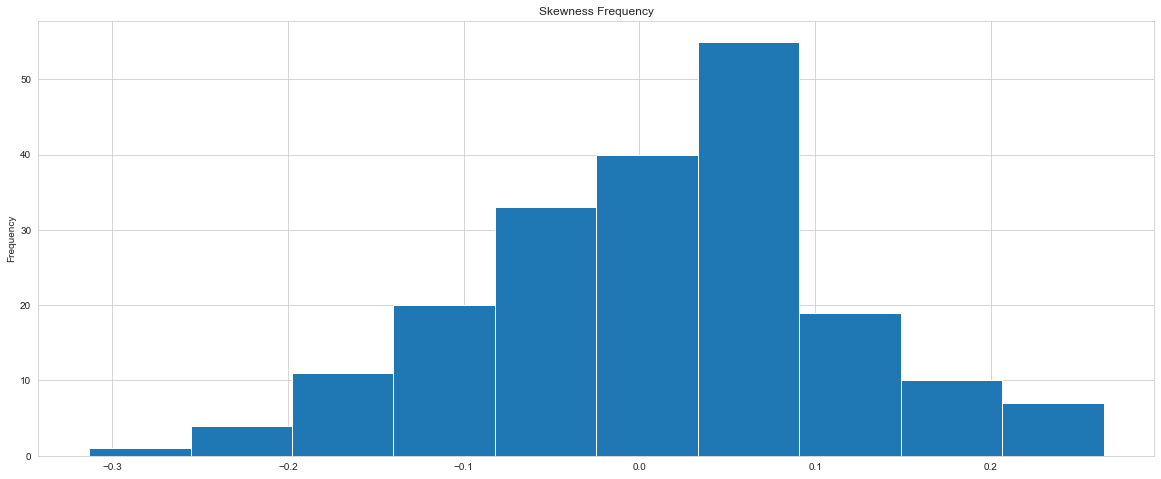

In [26]:
plt.figure(figsize=(20, 8))
train[numerical_features].skew().plot('hist');
plt.title('Skewness Frequency')

In [27]:
y = train['target']
x = train.drop(['target', "ID_code"], axis=1)

In [28]:
X_train, X_test, Y_train, Y_test =train_test_split(x, y, stratify = y, random_state=42, test_size=0.3)

In [29]:
print(X_train.shape) 
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(122551, 200)
(122551,)
(52522, 200)
(52522,)


In [30]:
#Decision Tree
#Replace target categories with Yes or No
train['target']=train['target'].replace(0,'No')

#apply on train data
c50_model=tree.DecisionTreeClassifier(criterion='entropy').fit(X_train,Y_train)

#Apply on test data
Y_pred=c50_model.predict(X_test)

In [31]:
#create confusion matrix
CM=confusion_matrix(Y_test,Y_pred)
CM=pd.crosstab(Y_test,Y_pred)

#let us save TP,TN,FN,FP
TN=CM.iloc[0,0]
FP=CM.iloc[1,0]
TP=CM.iloc[1,1]
FN=CM.iloc[0,1]
print(CM)

col_0       0     1
target             
0       43162  4229
1        4152   979


ROC score : 0.55


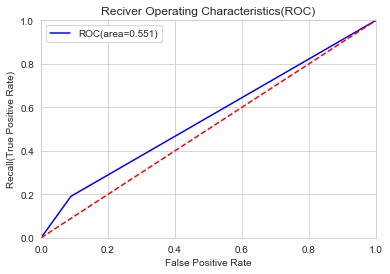

AUC: 0.5507823302768308


In [35]:
#ROC_AUC score
roc_score_dt = np.round(roc_auc_score(Y_test, Y_pred),2)
print('ROC score :',roc_score_dt)
#ROC_AUC curve
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(Y_test,Y_pred)
roc_auc_dt=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc_dt)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc_dt)

In [36]:
#Classification report 
scores=classification_report(Y_test,Y_pred)
print(scores)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     47391
           1       0.19      0.19      0.19      5131

    accuracy                           0.84     52522
   macro avg       0.55      0.55      0.55     52522
weighted avg       0.84      0.84      0.84     52522



In [38]:
#Random Forest
RF_model=RandomForestClassifier(n_estimators=10).fit(X_train,Y_train)
RF_Pred=RF_model.predict(X_test)

ROC score : 0.5067226716823265


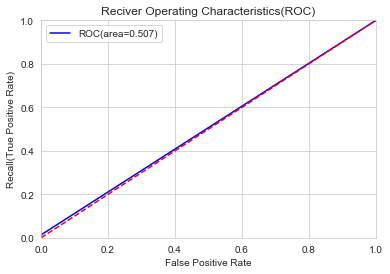

AUC: 0.5067226716823265


In [41]:
#ROC_AUC score
roc_score_rf=roc_auc_score(Y_test,RF_Pred)
print('ROC score :',roc_score_rf)
#ROC_AUC curve
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(Y_test,RF_Pred)
roc_auc_rf=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc_rf)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc_rf)

In [42]:
#Classification report 
scores=classification_report(Y_test,RF_Pred)
print(scores)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     47391
           1       0.51      0.02      0.03      5131

    accuracy                           0.90     52522
   macro avg       0.71      0.51      0.49     52522
weighted avg       0.87      0.90      0.86     52522



In [43]:
#Logistic Regression
lrg = LogisticRegression(random_state=42)
lrg.fit(X_train, Y_train)
y_pred_lrg = lrg.predict(X_test)

C:\Users\chandini c\Anaconda3\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [44]:
#Cross validation prediction
cv_predict=cross_val_predict(lrg,X_test,Y_test,cv=5)
#Cross validation score
cv_score=cross_val_score(lrg,X_test,Y_test,cv=5)
print('cross_val_score :',np.average(cv_score))

C:\Users\chandini c\Anaconda3\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chandini c\Anaconda3\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chandini c\Anaconda3\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chandini c\Anaconda3\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chandini c\Anaconda3\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

cross_val_score : 0.9150832208599764


ROC score : 0.6244763923405998


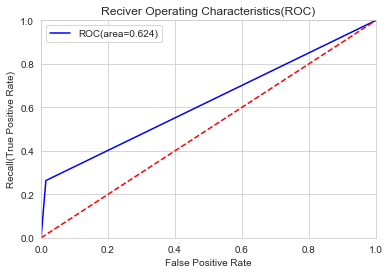

AUC: 0.6244763923405998


In [45]:
#ROC_AUC score
roc_score_lrg=roc_auc_score(Y_test,cv_predict)
print('ROC score :',roc_score_lrg)
#ROC_AUC curve
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(Y_test,cv_predict)
roc_auc_lrg=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc_lrg)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc_lrg)

In [46]:
#Classification report 
scores=classification_report(Y_test,y_pred_lrg)
print(scores)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     47391
           1       0.69      0.26      0.38      5131

    accuracy                           0.92     52522
   macro avg       0.81      0.63      0.67     52522
weighted avg       0.90      0.92      0.90     52522



ROC score : 0.6700517961965967


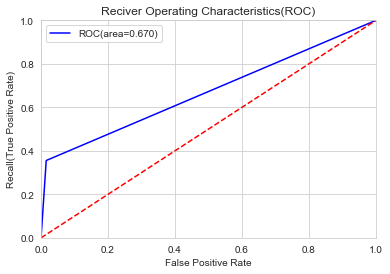

AUC: 0.6700517961965967


In [47]:
#Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
y_pred_gnb = gnb.predict(X_test)

#ROC_AUC score
roc_score_gnb=roc_auc_score(Y_test,y_pred_gnb)
print('ROC score :',roc_score_gnb)

#ROC_AUC curve
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(Y_test,y_pred_gnb)
roc_auc_gnb=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc_gnb)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc_gnb)


In [48]:
#Classification report 
scores=classification_report(Y_test,y_pred_gnb)
print(scores)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96     47391
           1       0.71      0.36      0.47      5131

    accuracy                           0.92     52522
   macro avg       0.82      0.67      0.72     52522
weighted avg       0.91      0.92      0.91     52522



In [49]:
#SMOTE
#Synthetic Minority Oversampling Technique
sm = SMOTE(random_state=42, ratio=1.0)
#Generating synthetic data points
X_smote,y_smote=sm.fit_sample(X_train,Y_train)
X_smote_v,y_smote_v=sm.fit_sample(X_test,Y_test)


In [50]:
#Logistic regression model for SMOTE
smote=LogisticRegression(random_state=42)
#fitting the smote model
smote.fit(X_smote,y_smote)

C:\Users\chandini c\Anaconda3\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
#Accuracy of the model
smote_score=smote.score(X_smote,y_smote)
print('Accuracy of the smote_model :',smote_score)

Accuracy of the smote_model : 0.7985422186852839


In [52]:
#Cross validation prediction
cv_pred=cross_val_predict(smote,X_smote_v,y_smote_v,cv=5)
#Cross validation score
cv_score=cross_val_score(smote,X_smote_v,y_smote_v,cv=5)
print('cross_val_score :',np.average(cv_score))

C:\Users\chandini c\Anaconda3\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chandini c\Anaconda3\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chandini c\Anaconda3\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chandini c\Anaconda3\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chandini c\Anaconda3\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

cross_val_score : 0.7970819415096922


In [53]:
#Confusion matrix
cm=confusion_matrix(y_smote_v,cv_pred)
cm=pd.crosstab(y_smote_v,cv_pred)

In [54]:
cm

col_0      0      1
row_0              
0      37392   9999
1       9234  38157

In [55]:
#Classification report 
scores=classification_report(y_smote_v,cv_pred)
print(scores)

              precision    recall  f1-score   support

           0       0.80      0.79      0.80     47391
           1       0.79      0.81      0.80     47391

    accuracy                           0.80     94782
   macro avg       0.80      0.80      0.80     94782
weighted avg       0.80      0.80      0.80     94782



ROC score : 0.7970817243780465


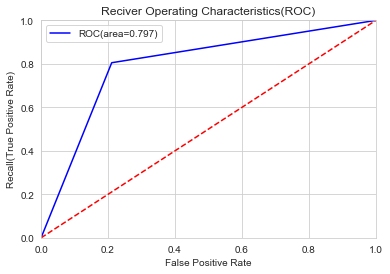

AUC: 0.7970817243780465


In [56]:
#ROC_AUC score
roc_score=roc_auc_score(y_smote_v,cv_pred)
print('ROC score :',roc_score)

#ROC_AUC curve
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_smote_v,cv_pred)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

In [57]:
#Predicting the model
X_test=test.drop(['ID_code'],axis=1)
smote_pred=smote.predict(X_test)
print(smote_pred)

print('\nWe can observe that smote model is performing well on imbalance data compare to Random Forest,logistic regression or any  other models')

[1 1 0 ... 0 0 1]

We can observe that smote model is performing well on imbalance data compare to Random Forest,logistic regression or any  other models


In [58]:
#final submission
sub_df=pd.DataFrame({'ID_code':test['ID_code'].values})
sub_df['smote_pred']=smote_pred
sub_df.to_csv('submission.csv',index=False)
sub_df.head()

ID_code  smote_pred
0  test_0           1
1  test_1           1
2  test_2           0
3  test_3           1
4  test_4           0